In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

C:\Users\gaeta\AppData\Local\Temp\ipykernel_12152\3818186681.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


## 1. Data exploration

In [3]:
df = pd.read_csv('train_V2.csv')

In [4]:
df.shape

(5000, 53)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 53 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   income_am              4947 non-null   float64
 1   profit_last_am         4947 non-null   float64
 2   profit_am              4947 non-null   float64
 3   damage_am              4954 non-null   float64
 4   damage_inc             4947 non-null   float64
 5   crd_lim_rec            4947 non-null   float64
 6   credit_use_ic          4947 non-null   float64
 7   gluten_ic              4947 non-null   float64
 8   lactose_ic             4947 non-null   float64
 9   insurance_ic           4947 non-null   float64
 10  spa_ic                 4970 non-null   float64
 11  empl_ic                4999 non-null   float64
 12  cab_requests           4912 non-null   float64
 13  married_cd             5000 non-null   bool   
 14  bar_no                 4947 non-null   float64
 15  spor

In [6]:
df.head()

,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,...,score2_neg,score3_pos,score3_neg,score4_pos,score4_neg,score5_pos,score5_neg,outcome_profit,outcome_damage_inc,outcome_damage_amount
0,227.0,0.0,3201.0,888.0,6.0,15000.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.838147,0.082288,NaN,NaN,1791.66,0,0.00
1,268.0,16.0,1682.0,0.0,0.0,750.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,7.955259,1672.78,1,829.66
2,283.0,23.0,1673.0,0.0,0.0,750.0,0.0,0.0,0.0,1.0,...,0.099529,NaN,NaN,NaN,NaN,0.101955,1.743020,1001.40,0,0.00
3,227.0,0.0,1685.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.889793,NaN,NaN,NaN,NaN,1785.59,0,0.00
4,4091.0,1028.0,3425.0,785.0,2.0,14000.0,0.0,0.0,1.0,0.0,...,NaN,0.330503,0.766294,0.490486,0.542445,NaN,NaN,3140.74,0,0.00


In [7]:
df[['gender','married_cd','client_segment','presidential','company_ic','retired']] = df[['gender','married_cd','client_segment','presidential','company_ic','retired']].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 53 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   income_am              4947 non-null   float64 
 1   profit_last_am         4947 non-null   float64 
 2   profit_am              4947 non-null   float64 
 3   damage_am              4954 non-null   float64 
 4   damage_inc             4947 non-null   float64 
 5   crd_lim_rec            4947 non-null   float64 
 6   credit_use_ic          4947 non-null   float64 
 7   gluten_ic              4947 non-null   float64 
 8   lactose_ic             4947 non-null   float64 
 9   insurance_ic           4947 non-null   float64 
 10  spa_ic                 4970 non-null   float64 
 11  empl_ic                4999 non-null   float64 
 12  cab_requests           4912 non-null   float64 
 13  married_cd             5000 non-null   category
 14  bar_no                 4947 non-null   f

Missing data

In [9]:
df.isnull().sum()[df.isnull().sum() != 0]

income_am             53
profit_last_am        53
profit_am             53
damage_am             46
damage_inc            53
crd_lim_rec           53
credit_use_ic         53
gluten_ic             53
lactose_ic            53
insurance_ic          53
spa_ic                30
empl_ic                1
cab_requests          88
bar_no                53
sport_ic              53
neighbor_income      239
age                   53
marketing_permit      53
urban_ic              53
dining_ic             88
presidential          88
client_segment        53
sect_empl             53
prev_stay             53
prev_all_in_stay      53
divorce               53
fam_adult_size        53
children_no           53
tenure_mts           392
tenure_yrs           392
company_ic            53
claims_no             53
claims_am             27
nights_booked         53
gender                53
shop_am               53
shop_use              88
retired               53
gold_status           53
score1_pos          3775


Look at descriptives and correlations

In [10]:
df.iloc[:,0:20].describe(include='all')

,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,spa_ic,empl_ic,cab_requests,married_cd,bar_no,sport_ic,neighbor_income,age,marketing_permit,urban_ic
count,4947.000000,4947.000000,4947.000000,4954.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4970.000000,4999.000000,4912.000000,5000,4947.000000,4947.000000,4761.000000,4947.000000,4947.000000,4947.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4057,NaN,NaN,NaN,NaN,NaN,NaN
mean,2281.260158,696.057712,3637.900950,145.952967,0.352335,3298.716394,0.041237,0.024661,0.094199,0.390944,0.401811,0.024205,6.051507,NaN,5.646250,0.287043,32778.558916,44.901152,0.495452,0.883970
std,8365.254507,3051.119275,5726.625669,581.068095,0.889449,4549.646039,0.198858,0.155107,0.292134,0.488011,0.490313,0.153700,3.112104,NaN,5.052513,0.452427,6858.671948,16.225094,0.500030,0.320293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000
25%,229.000000,0.000000,1638.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,NaN,2.000000,0.000000,28630.000000,31.000000,0.000000,1.000000
50%,469.000000,52.000000,1889.000000,0.000000,0.000000,1500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,NaN,5.000000,0.000000,31990.000000,45.000000,0.000000,1.000000
75%,1688.000000,810.000000,3165.500000,0.000000,0.000000,5000.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,9.000000,NaN,8.000000,1.000000,35924.000000,57.000000,1.000000,1.000000


In [11]:
df.iloc[:,20:40].describe(include='all')

,dining_ic,presidential,client_segment,sect_empl,prev_stay,prev_all_in_stay,divorce,fam_adult_size,children_no,tenure_mts,tenure_yrs,company_ic,claims_no,claims_am,nights_booked,gender,shop_am,shop_use,retired,gold_status
count,4912.000000,4912.0,4947.0,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4608.000000,4608.000000,4947.0,4947.000000,4973.000000,4947.000000,4947,4947.000000,4912.000000,4947.0,4947.000000
unique,NaN,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2,NaN,NaN,2.0,NaN
top,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M,NaN,NaN,0.0,NaN
freq,NaN,4891.0,3389.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4855.0,NaN,NaN,NaN,2490,NaN,NaN,4046.0,NaN
mean,0.049267,NaN,NaN,0.213463,0.889832,0.252678,0.102486,1.960986,0.385082,273.111545,22.780165,NaN,0.218314,121.078826,28.992521,NaN,403.019960,0.151873,NaN,0.034769
std,0.216447,NaN,NaN,0.826006,0.313130,0.434592,0.303317,0.805545,0.832933,152.498416,12.719429,NaN,0.712408,1783.146726,37.480510,NaN,1335.935144,0.358934,NaN,0.183212
min,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,1.000000,NaN,0.000000,0.000000,NaN,0.000000
25%,0.000000,NaN,NaN,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,154.000000,13.000000,NaN,0.000000,0.000000,4.000000,NaN,0.000000,0.000000,NaN,0.000000
50%,0.000000,NaN,NaN,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,271.000000,23.000000,NaN,0.000000,0.000000,11.000000,NaN,0.000000,0.000000,NaN,0.000000
75%,0.000000,NaN,NaN,0.000000,1.000000,1.000000,0.000000,3.000000,0.000000,368.250000,31.000000,NaN,0.000000,0.000000,45.000000,NaN,0.000000,0.000000,NaN,0.000000


In [12]:
df.iloc[:,40:].describe(include='all')

,score1_pos,score1_neg,score2_pos,score2_neg,score3_pos,score3_neg,score4_pos,score4_neg,score5_pos,score5_neg,outcome_profit,outcome_damage_inc,outcome_damage_amount
count,1.225000e+03,1.314000e+03,1.209000e+03,1.304000e+03,1.261000e+03,1.367000e+03,1.223000e+03,1.324000e+03,1.232000e+03,1493.000000,5000.000000,5000.000000,5000.000000
mean,4.997356e-01,5.003663e-01,4.985522e-01,4.967340e-01,4.942801e-01,4.985876e-01,4.962065e-01,5.013962e-01,5.009593e-01,5.192953,1967.310930,0.255400,189.970736
std,2.879255e-01,2.887168e-01,2.877572e-01,2.897994e-01,2.899165e-01,2.877292e-01,2.886538e-01,2.876226e-01,2.901323e-01,3.159868,1371.061266,0.436129,379.005941
min,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,-7.871775,10.680000,0.000000,0.000000
25%,2.520205e-01,2.510338e-01,2.521282e-01,2.454209e-01,2.405574e-01,2.495061e-01,2.474100e-01,2.506703e-01,2.514905e-01,3.124958,1333.320000,0.000000,0.000000
50%,4.974162e-01,4.986215e-01,4.987791e-01,4.985832e-01,4.942465e-01,5.016458e-01,4.933486e-01,5.020603e-01,5.029121e-01,5.188006,1721.235000,0.000000,0.000000
75%,7.487276e-01,7.516726e-01,7.441403e-01,7.474935e-01,7.449235e-01,7.464826e-01,7.452133e-01,7.493876e-01,7.512817e-01,7.357425,2223.712500,1.000000,202.612500
max,9.999999e-01,9.999999e-01,9.999999e-01,9.986510e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.993125e-01,9.999999e-01,14.776319,31529.000000,1.000000,3157.240000


There are outliers: Two indicators for positive outliers are when the maximum value is a lot higher than the 75%-percentile and when the mean is higher than the median (50%-percentile).

we still need to decide if we want to keep the outliers or not this will make our analysis more robust

## Plot the distributions

array([[<Axes: title={'center': 'income_am'}>,
        <Axes: title={'center': 'profit_last_am'}>,
        <Axes: title={'center': 'profit_am'}>,
        <Axes: title={'center': 'damage_am'}>,
        <Axes: title={'center': 'damage_inc'}>,
        <Axes: title={'center': 'crd_lim_rec'}>,
        <Axes: title={'center': 'credit_use_ic'}>],
       [<Axes: title={'center': 'gluten_ic'}>,
        <Axes: title={'center': 'lactose_ic'}>,
        <Axes: title={'center': 'insurance_ic'}>,
        <Axes: title={'center': 'spa_ic'}>,
        <Axes: title={'center': 'empl_ic'}>,
        <Axes: title={'center': 'cab_requests'}>,
        <Axes: title={'center': 'bar_no'}>],
       [<Axes: title={'center': 'sport_ic'}>,
        <Axes: title={'center': 'neighbor_income'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'marketing_permit'}>,
        <Axes: title={'center': 'urban_ic'}>,
        <Axes: title={'center': 'dining_ic'}>,
        <Axes: title={'center': 'sect_empl

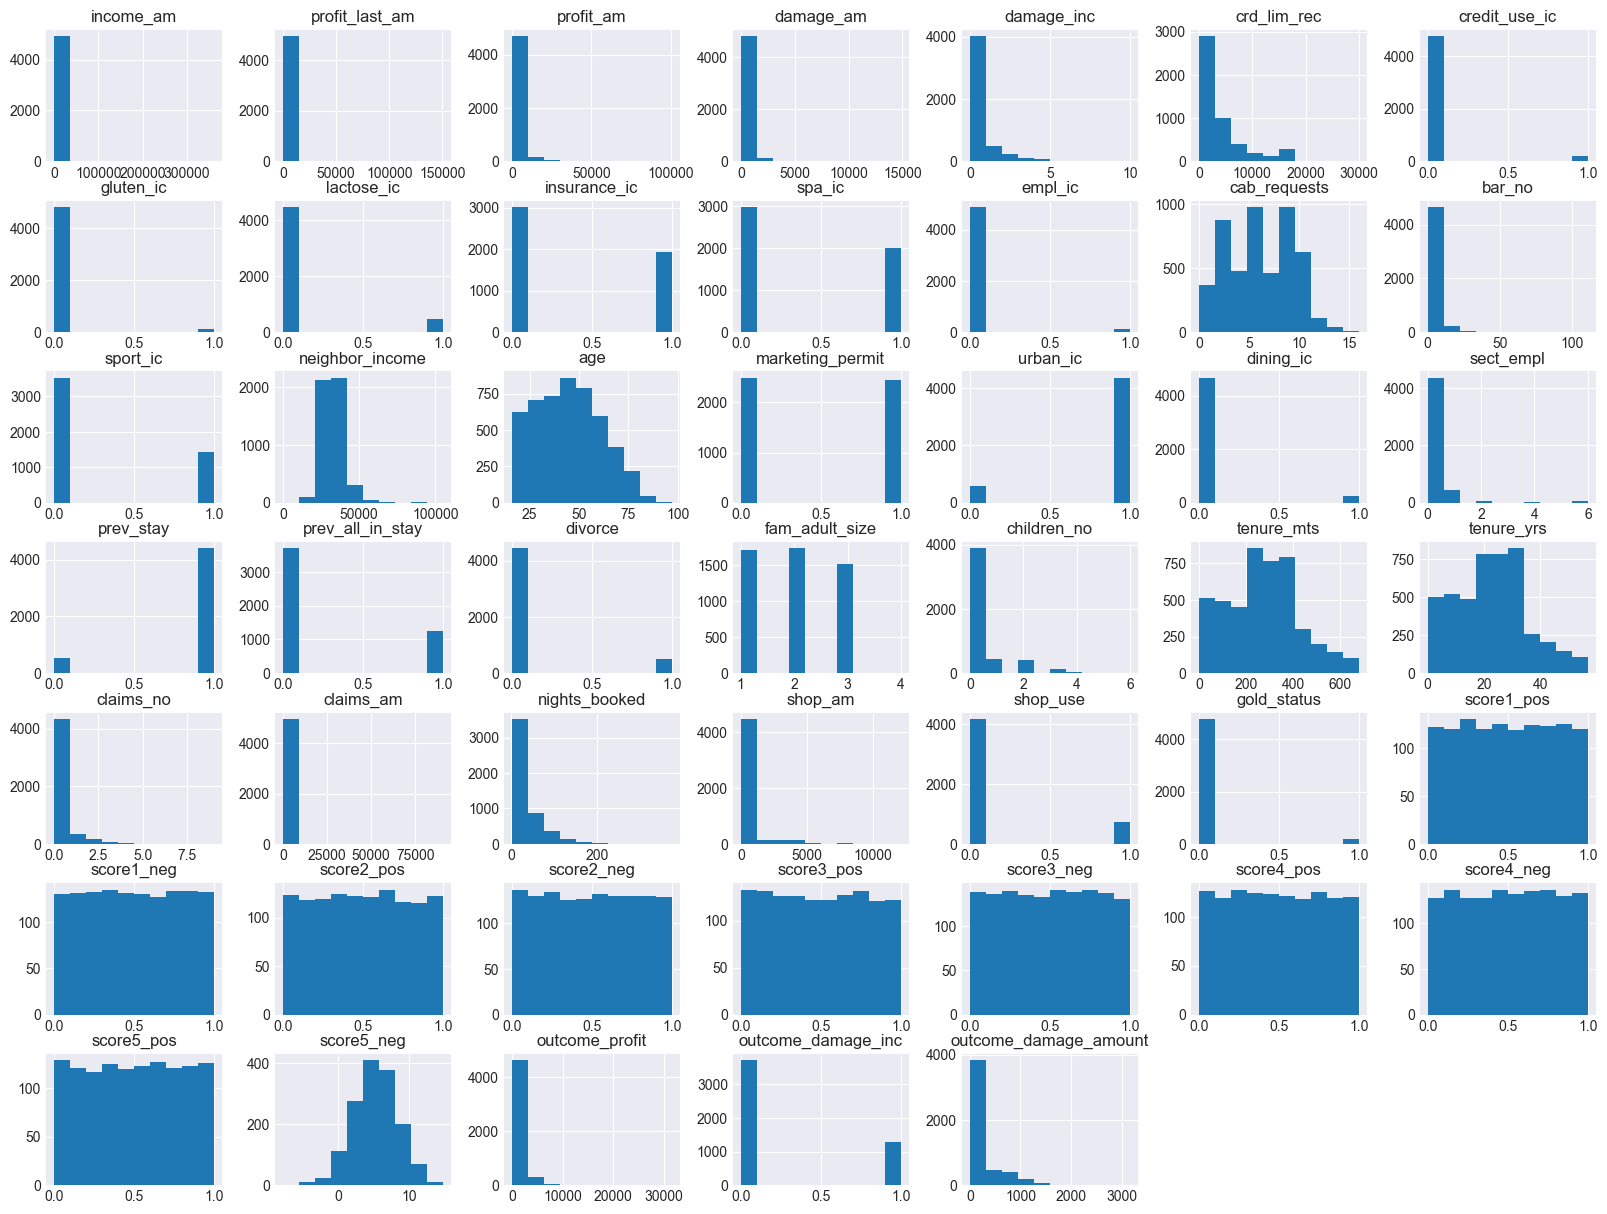

In [13]:
df.hist(figsize=(20,15))

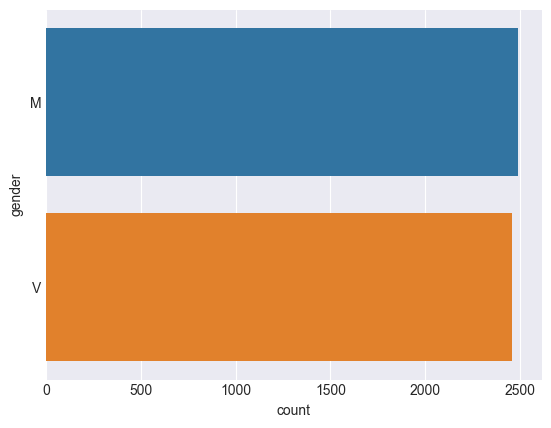

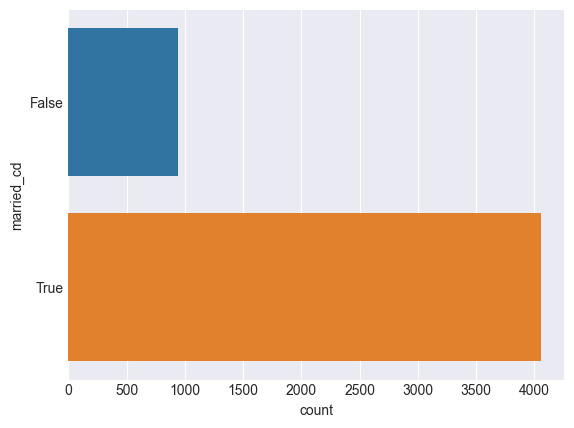

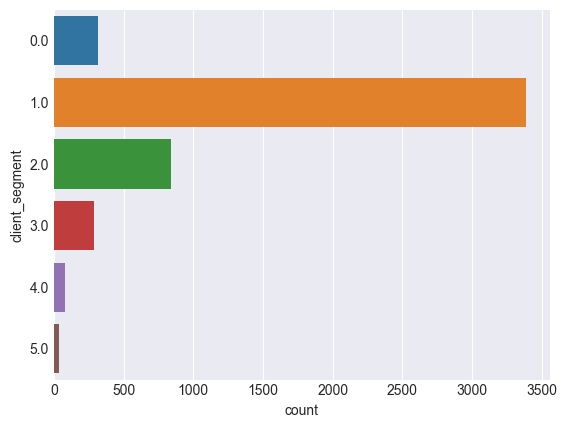

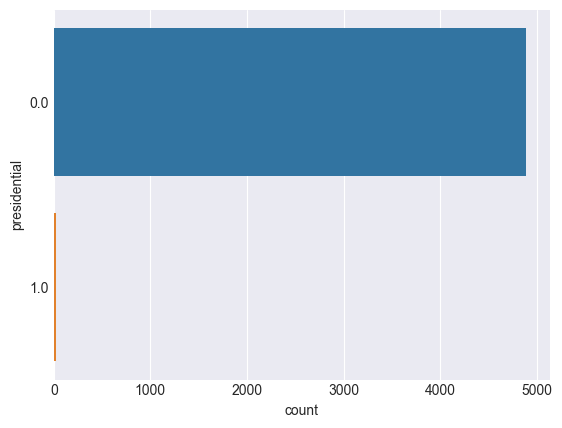

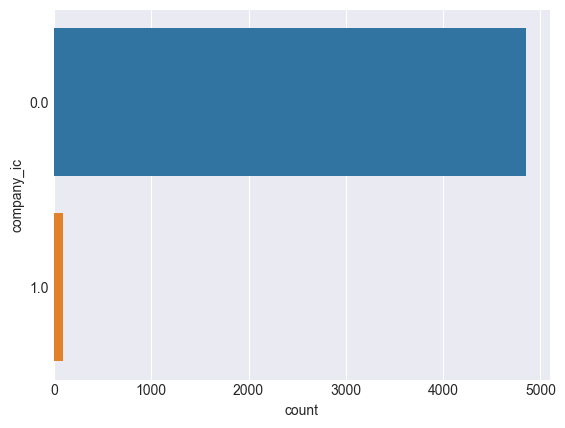

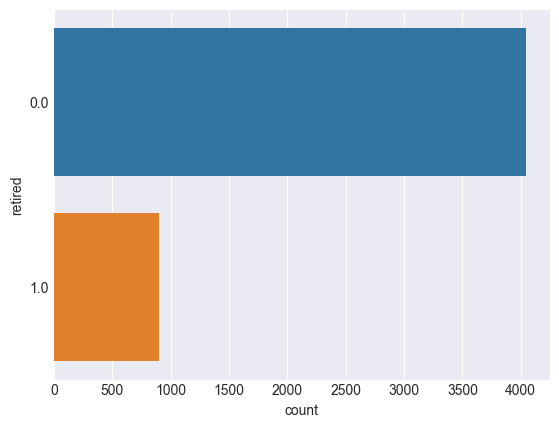

In [14]:
categorical = ['gender','married_cd','client_segment','presidential','company_ic','retired']
for i in categorical: 
    sns.countplot(y=df[i])
    plt.show()

### Associations between features

the heatmap to see the correlations between the features

C:\Users\gaeta\AppData\Local\Temp\ipykernel_12152\4037706959.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


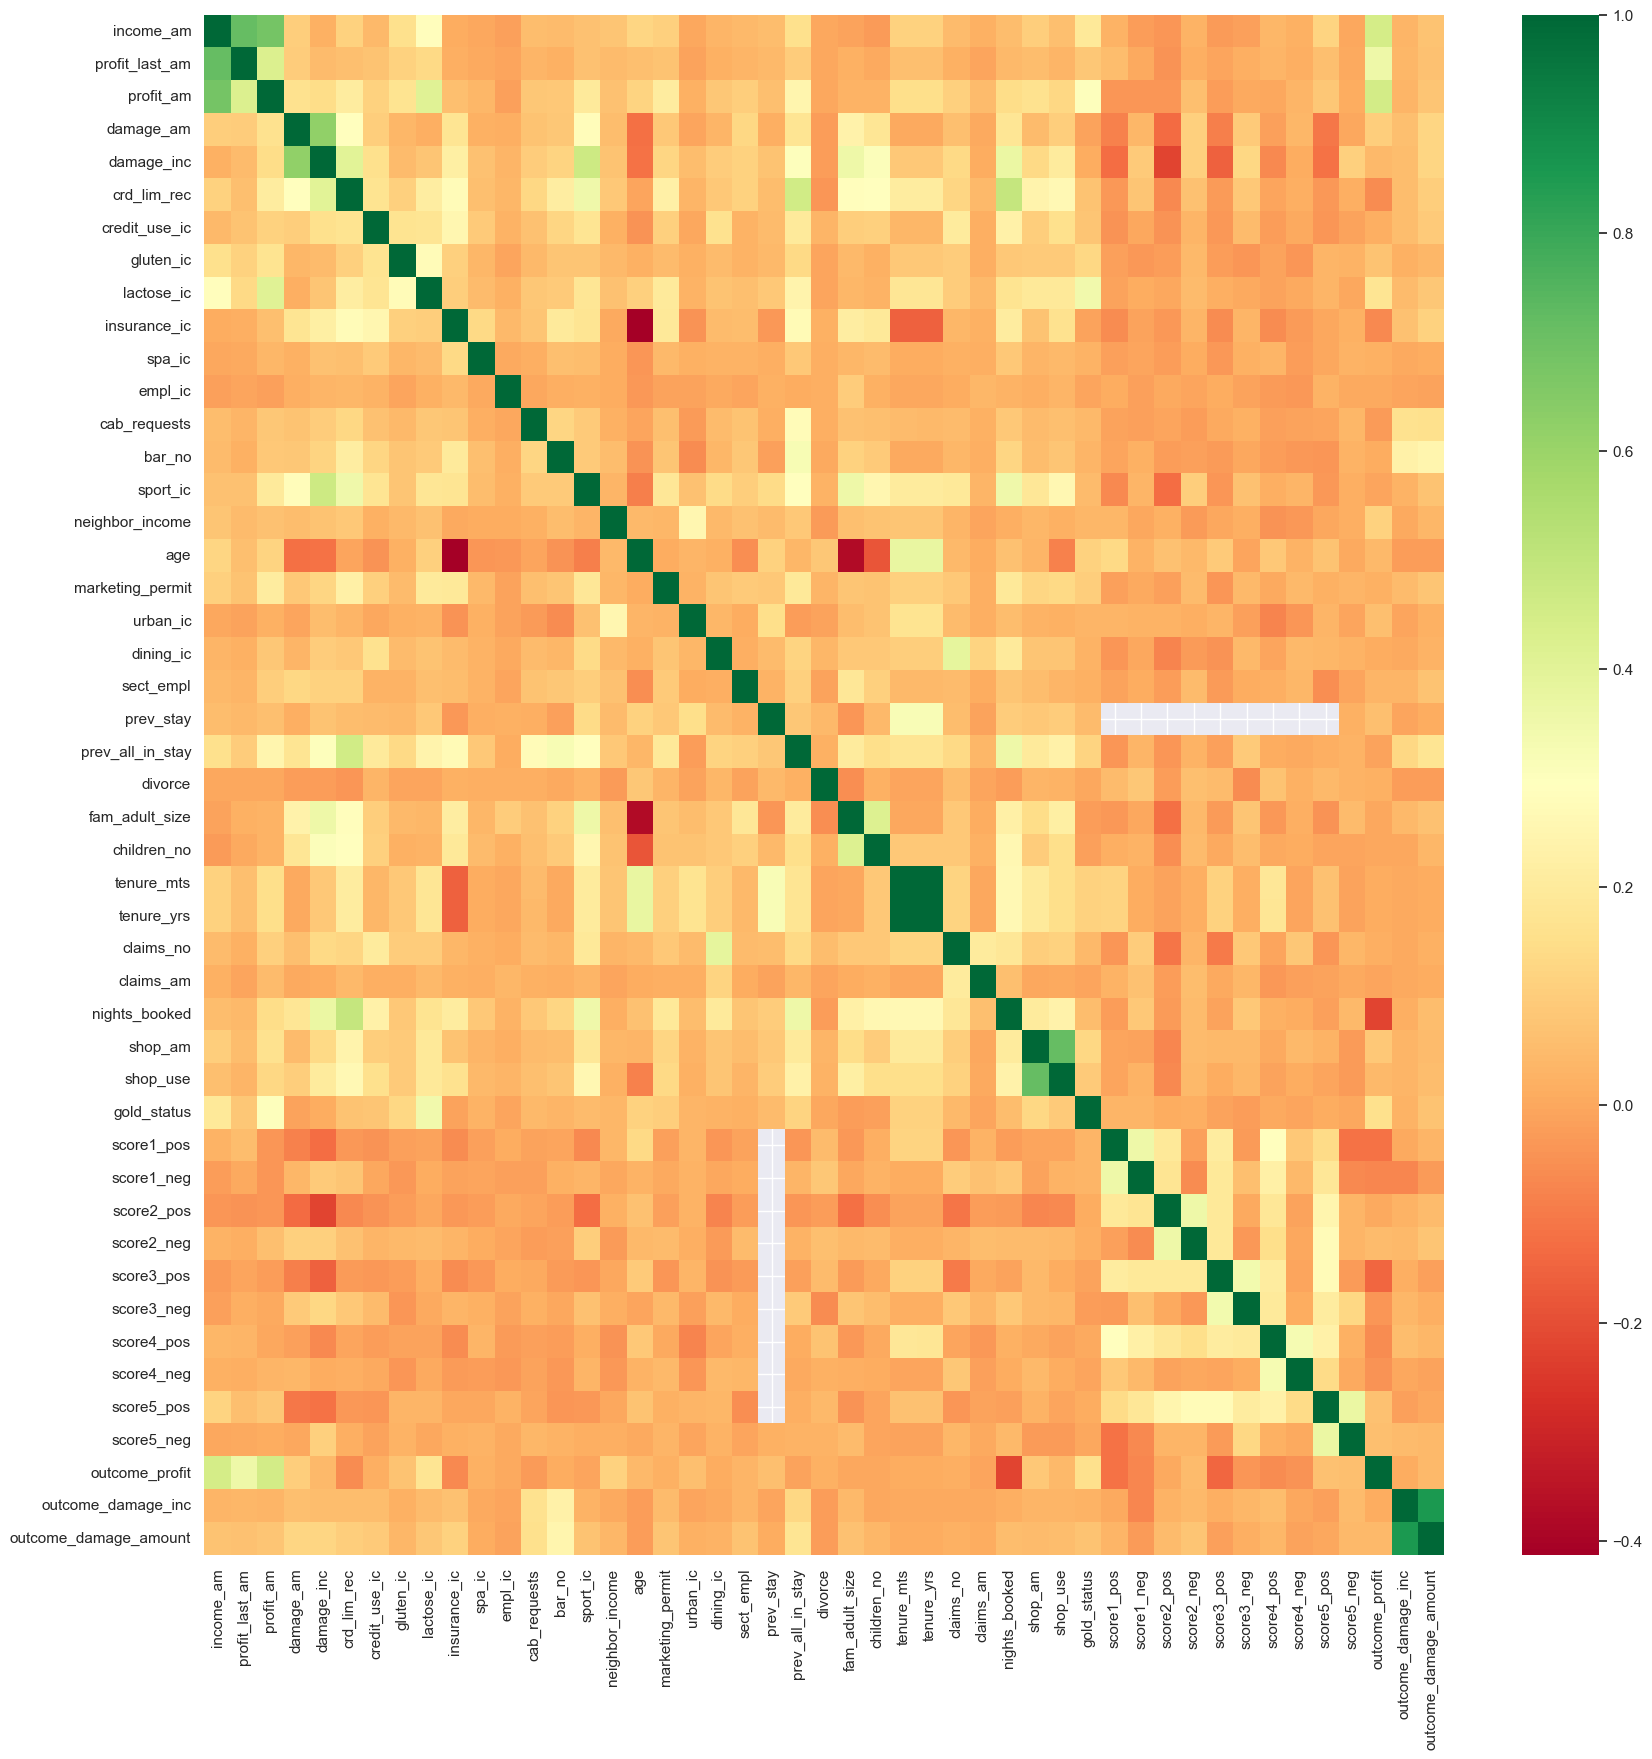

In [24]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, cmap='RdYlGn');

C:\Users\gaeta\AppData\Local\Temp\ipykernel_12152\3683446855.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  features = features.drop(['income_am'],1)


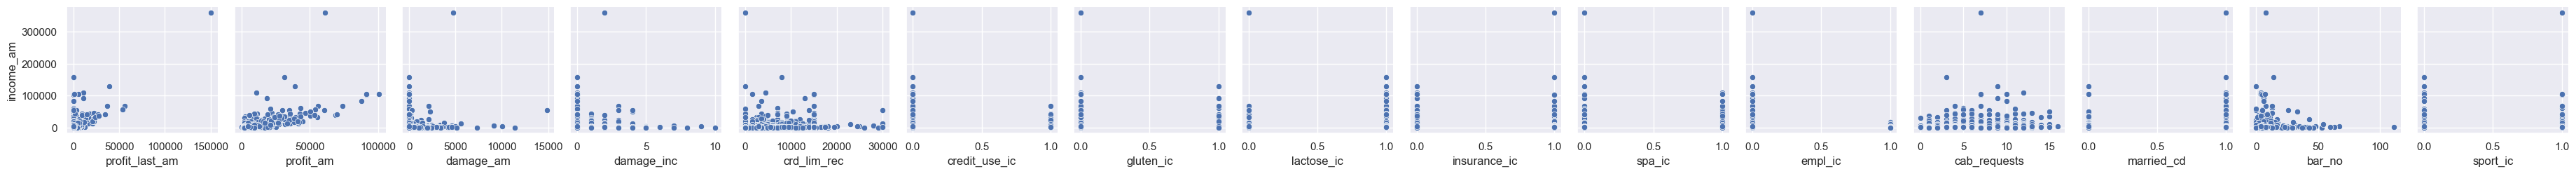

In [16]:
sns.set()
features = df.copy()
features = features.drop(['income_am'],1)
xvars = features.columns
sns.pairplot(df, y_vars=['income_am'],x_vars=xvars[0:15])#verander de 15 naarmate je meer variabelen wilt bekijken
plt.show();

# 2. Data cleaning
- checking duplicates and removing these

In [17]:
df_no_dup = df.copy()

df_no_dup.drop_duplicates()   # Remove the duplicates

print(df_no_dup.shape)               # check the remaining number of observations
df_no_dup.info()  

(5000, 53)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 53 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   income_am              4947 non-null   float64 
 1   profit_last_am         4947 non-null   float64 
 2   profit_am              4947 non-null   float64 
 3   damage_am              4954 non-null   float64 
 4   damage_inc             4947 non-null   float64 
 5   crd_lim_rec            4947 non-null   float64 
 6   credit_use_ic          4947 non-null   float64 
 7   gluten_ic              4947 non-null   float64 
 8   lactose_ic             4947 non-null   float64 
 9   insurance_ic           4947 non-null   float64 
 10  spa_ic                 4970 non-null   float64 
 11  empl_ic                4999 non-null   float64 
 12  cab_requests           4912 non-null   float64 
 13  married_cd             5000 non-null   category
 14  bar_no                 4947 n

we still have 5000 observations so no duplicates were found.

still need to include a part like in the demo after the duplicated part but I don't know how to do that

disposal of irrelevant features(gluten_ic, lactose_ic, cab_requests,fam_adult_size,gender)      discrimination????=> (age, married_ic, divorce)

In [25]:
df_no_irrelevant_features = df_no_dup.drop(['gluten_ic','lactose_ic','cab_requests','fam_adult_size','gender'],1)

C:\Users\gaeta\AppData\Local\Temp\ipykernel_12152\2216519997.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_no_irrelevant_features = df_no_dup.drop(['gluten_ic','lactose_ic','cab_requests','fam_adult_size','gender'],1)


- DEALING WITH UNWANTED OUTLIERS

C:\Users\gaeta\AppData\Local\Temp\ipykernel_12152\3683446855.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  features = features.drop(['income_am'],1)


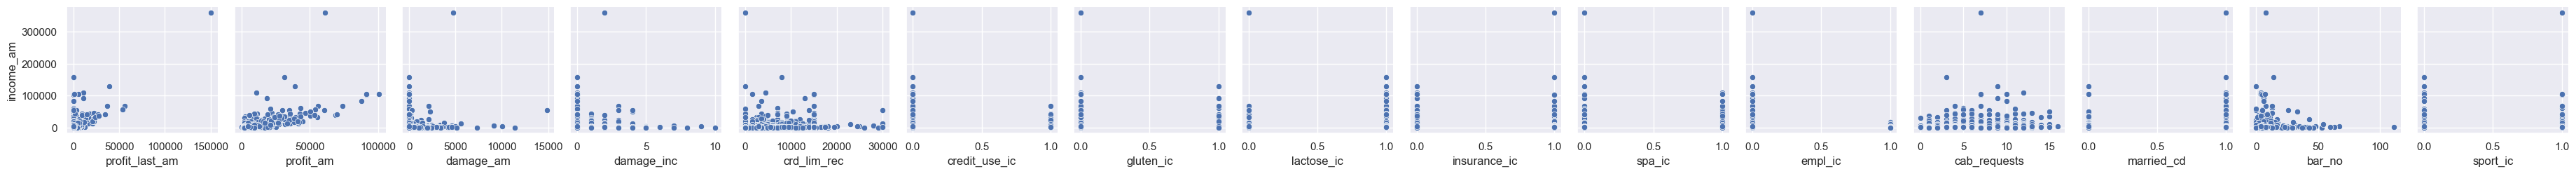

In [22]:
sns.set()
features = df.copy()
features = features.drop(['income_am'],1)
xvars = features.columns
sns.pairplot(df, y_vars=['income_am'],x_vars=xvars[0:15])#verander de 15 naarmate je meer variabelen wilt bekijken
plt.show();

belangrijke opmerkingen de 5 scores op de 5 hotels mss het gemiddelde nemen om 1 value te krijgen of de mediaan zo kunnen we missing values (invullen)